In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
#from sklearn.cross_validation import train_test_split 
from sklearn import metrics 
#from sklearn.cross_validation import cross_val_score 
dta = sm.datasets.fair.load_pandas().data

#add "affair" column: 1 represents having affairs, 0
#represents not 
dta['affair'] = (dta.affairs > 0).astype(int)

In [3]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


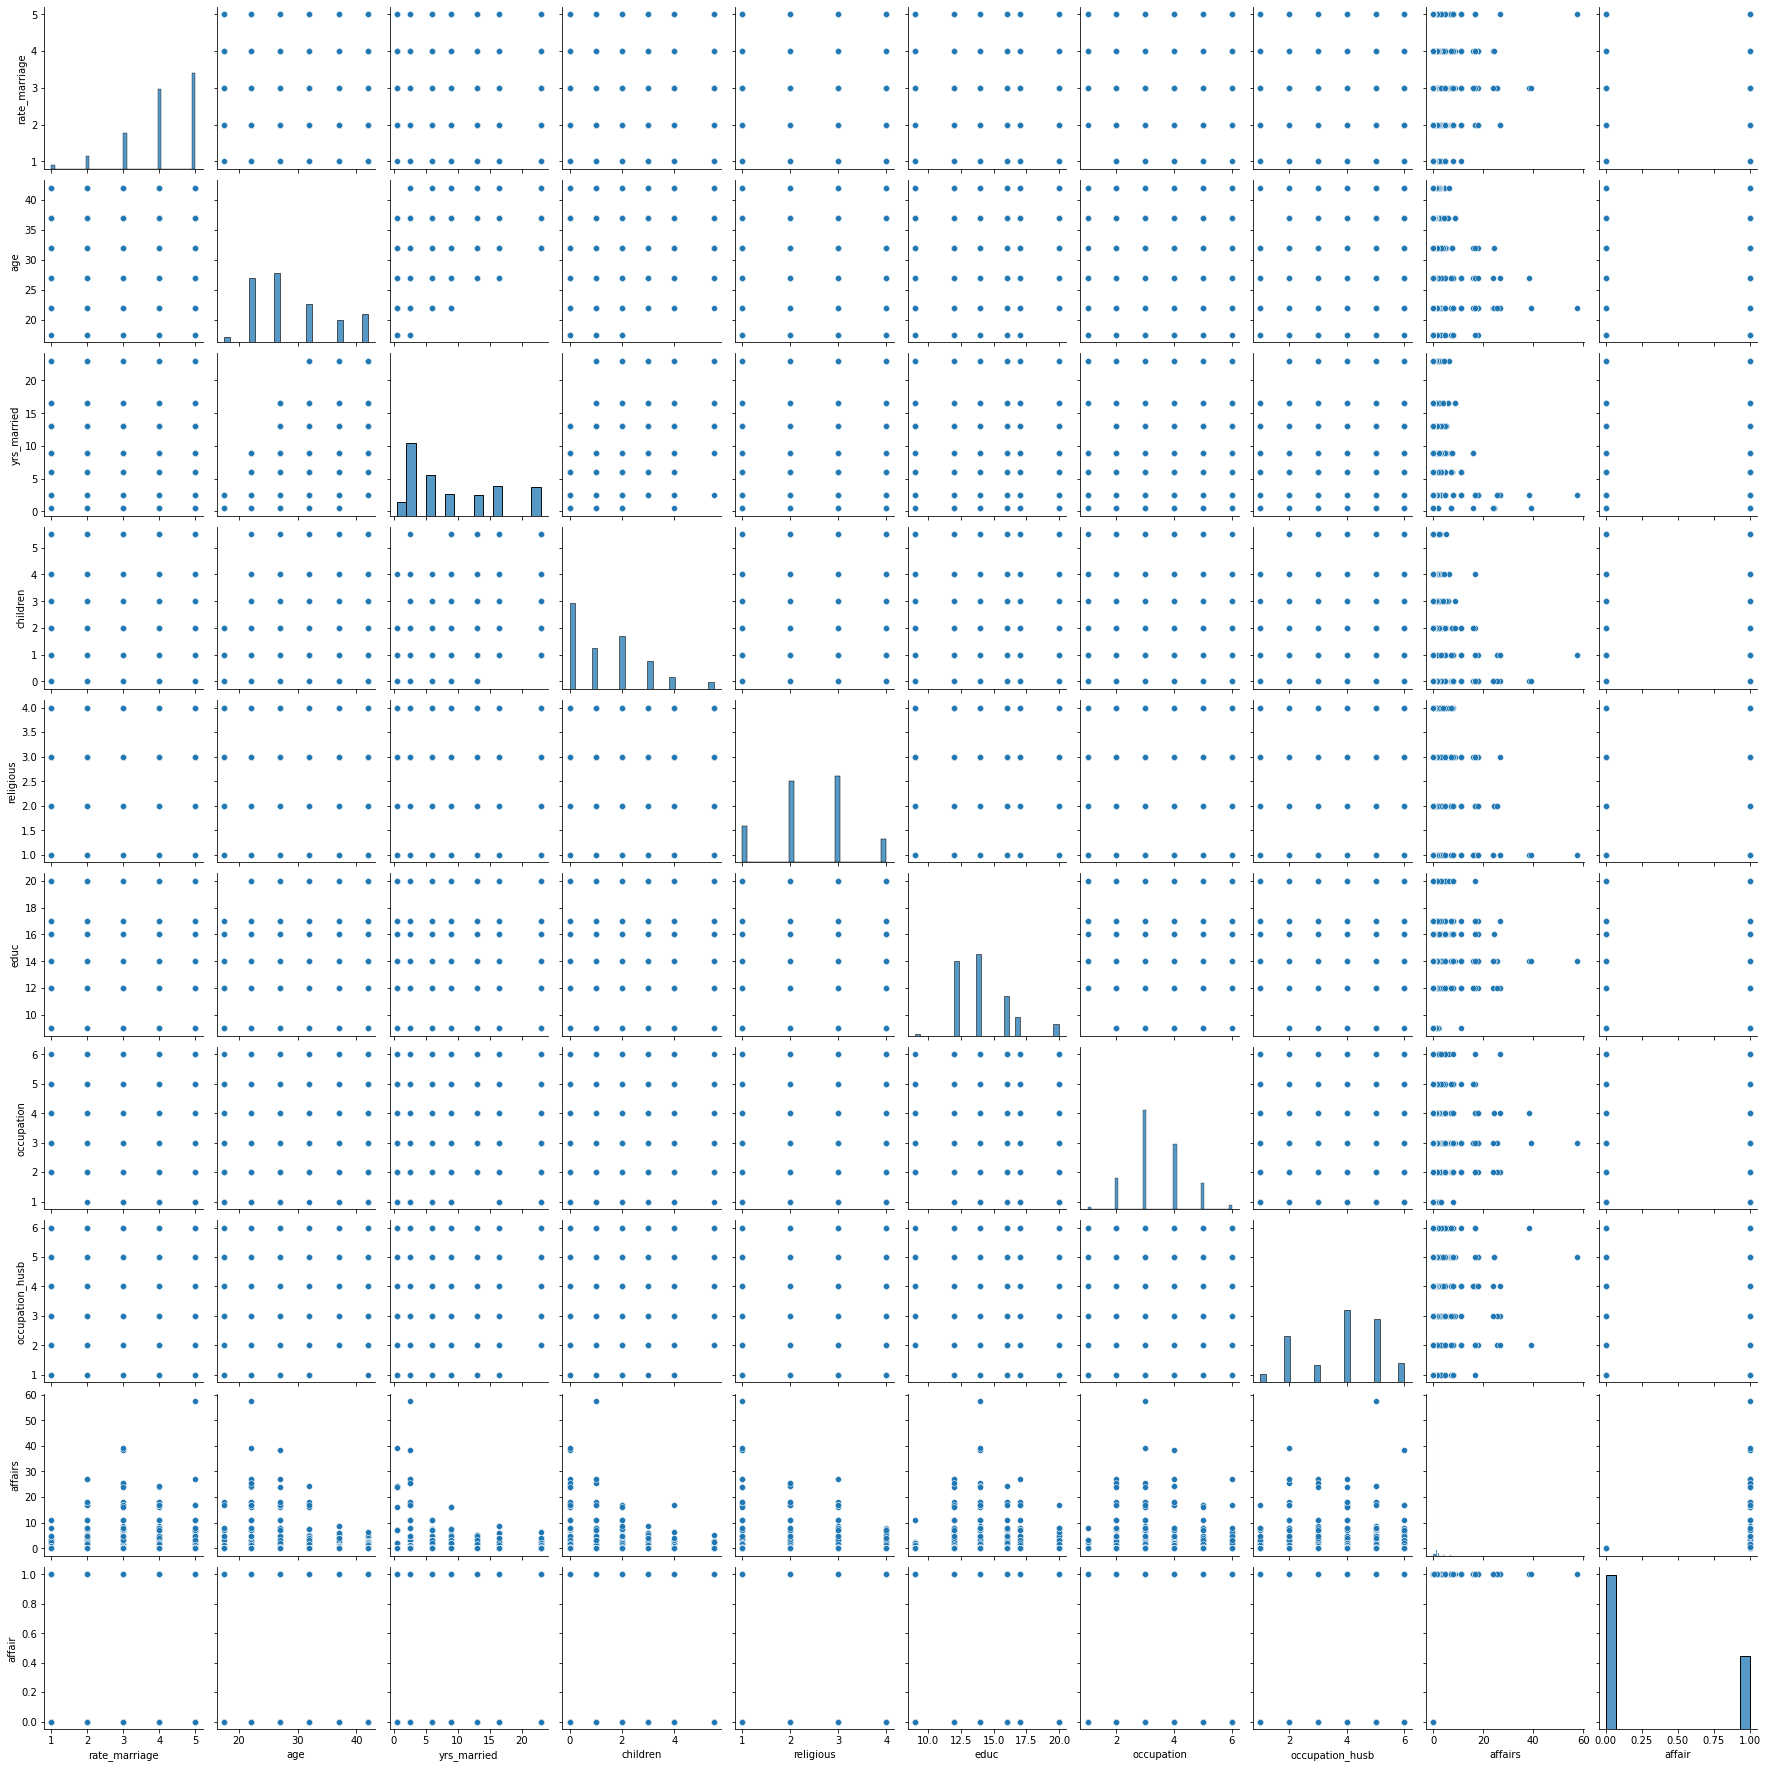

In [6]:
import seaborn as sns
sns.pairplot(dta)

In [7]:
dta['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [8]:
corr = dta.corr()

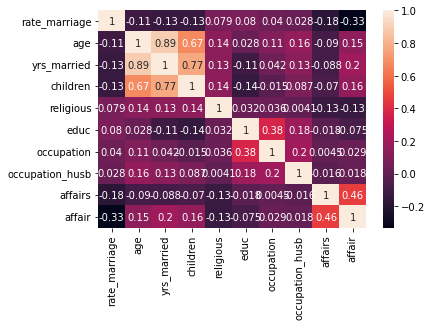

In [9]:
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
corr[['affair']].sort_values(by='affair')

,affair
rate_marriage,-0.331776
religious,-0.129299
educ,-0.075280
occupation_husb,0.017637
occupation,0.028981
age,0.146519
children,0.159833
yrs_married,0.203109
affairs,0.464046
affair,1.000000


We can see there is Strong correlation between affair(class) and affairs(feature) of having 46.40% and then with feature yrs_married of 20.31%. with when it comes to rate marriage it has very strong negative correlation with the prediction class and then with religious we are having religious and that's is what we are looking for. 

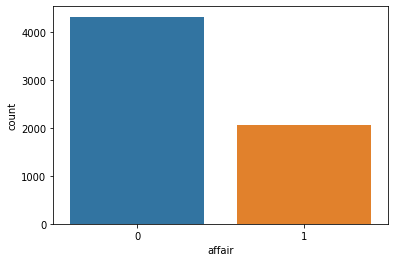

In [11]:
# let's check for the class weightage 
sns.countplot(x='affair',data = dta)

So, we can see the percentage of women having no affair is more than the women having affair.

In [12]:
# let's check for is outlier is present 
# here i am just trying to make a function to all our outlier analysis
def checkOutliers(data,columnNames:list):
  for columnName in columnNames:
    sns.boxplot(data[columnName])
    plt.title(str(columnName)+'_boxplot')
    Q1 = np.percentile(data[columnName], 25,
                    interpolation = 'midpoint')
  
    Q3 = np.percentile(data[columnName], 75,
                      interpolation = 'midpoint')
    IQR = Q3 - Q1

    upperLimit = Q3 +1.5*IQR
    lowerLimit = Q1 - 1.5*IQR
    # Upper Bound
    upperValues = np.where(data[columnName] >= upperLimit)
    # Lower bound
    lowerValues = np.where(data[columnName] <=  lowerLimit)
    # i am not printing the values 
    #print(f'Upper Values -\n {upperValues}\nLower values -\n{lowerValues}')
    print(f'{columnName} - there is {np.count_nonzero(upperValues)} upper bound values and {np.count_nonzero(lowerValues)} lower bound values ')
    plt.show()

rate_marriage - there is 0 upper bound values and 447 lower bound values 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


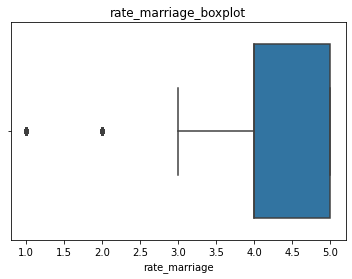

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


age - there is 0 upper bound values and 0 lower bound values 


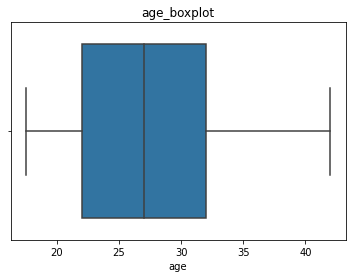

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


yrs_married - there is 0 upper bound values and 0 lower bound values 


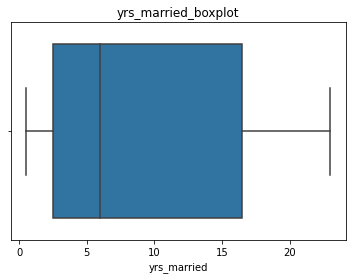

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


children - there is 203 upper bound values and 0 lower bound values 


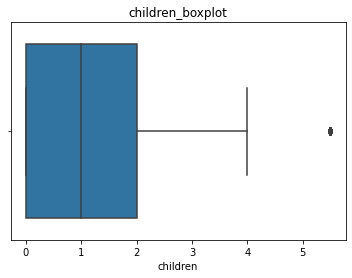

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


religious - there is 0 upper bound values and 0 lower bound values 


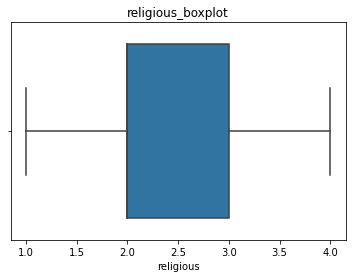

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


educ - there is 0 upper bound values and 0 lower bound values 


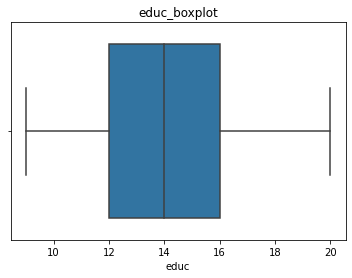

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


occupation - there is 109 upper bound values and 41 lower bound values 


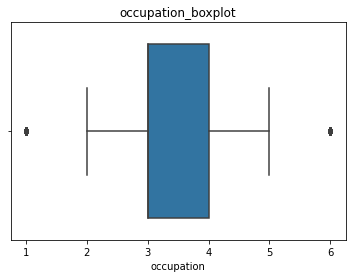

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


occupation_husb - there is 0 upper bound values and 0 lower bound values 


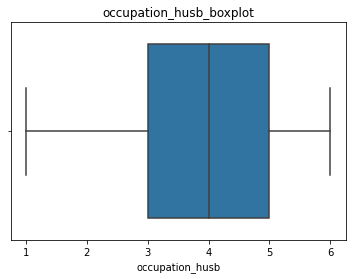

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


affairs - there is 1049 upper bound values and 0 lower bound values 


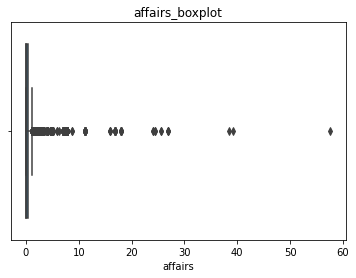

In [13]:
# let's check if outliers are present in the features
checkOutliers(data = dta , columnNames=list(dta.columns)[:-1])

so yes , WE do have some of the outliers present in our dataset features mainly in rate_marriage, children, occupation, affairs.



In [14]:
# let's check if null values are present in the dateset
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

SO, there is no values present in the dataset.

# Base model - Logistic regression without any data cleaning , feature selection , and feature scaling.

In [15]:
X = dta.drop('affair',axis=1).values
y = dta['affair'].values

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [18]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [19]:
round(model.score(X_train,y_train) * 100,2)

97.55

In [20]:
round(model.score(X_test,y_test) * 100,2)

98.06

so, on training set we have an accuracy of 97.6 and on testing set we do have an accuracy of 97.91 which is good.

In [21]:
predictions = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[1294    0]
 [  37  579]]


If we look into the metrics and say 0 as not having affairs and 1 as having affairs then 40 times our model is having type 2 error that mean in actual a women is having affair but the model predict she has no affair, This term is bascially type -2 error , while our model has learned well enough to predict the affair result correctly. 

In [23]:
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)
precision = TP/(TP+TN)
recall = TP/(TP+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy*100))
print('precision of the binary classification = {:0.3f}'.format(precision*100))
print('recall of the binary classification = {:0.3f}'.format(recall*100))

True Positive(TP)  =  579
False Positive(FP) =  0
True Negative(TN)  =  1294
False Negative(FN) =  37
Accuracy of the binary classification = 98.063
precision of the binary classification = 30.913
recall of the binary classification = 93.994


In [25]:
from sklearn.model_selection import GridSearchCV
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

  liblinear 0.974
  newton-cg 0.974
  lbfgs 0.974
  sag 0.955
  saga 0.944


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


In [26]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [27]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.7379927128188142, 1: 1.5504523312456506}

In [28]:
lr_basemodel =LogisticRegression(class_weight=class_weights)
# train model to learn relationships between input and output variables
lr_basemodel.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.7379927128188142, 1: 1.5504523312456506})

In [29]:
y_pred_basemodel = lr_basemodel.predict(X_test)

In [30]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_test,y_pred_basemodel))


f1 score for base model is :  0.9631490787269682


In [31]:
from sklearn.model_selection import StratifiedKFold

#Hyperparameter tuning

# define model/create instance
lr=LogisticRegression()
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)
#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15000 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueErro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                      

In [32]:
X_train.shape

(4456, 9)

In [33]:
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.9756030238717273
Best hyperparameters:  {'C': 20, 'class_weight': {0: 0.15673346693386775, 1: 0.8432665330661322}, 'penalty': 'l2'}


In [34]:
#Building Model again with best params
lr2=LogisticRegression(class_weight= {0: 0.12895791583166333, 1: 0.8710420841683366},C=20,penalty="l2")
lr2.fit(X_train,y_train)


LogisticRegression(C=20,
                   class_weight={0: 0.12895791583166333, 1: 0.8710420841683366})

In [35]:
# predict probabilities on Test and take probability for class 1([:1])
from sklearn import metrics
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr2.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :nn",cm)
print("n")
# ROC- AUC score
print("ROC-AUC score  test dataset:  ", metrics.roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  ", metrics.precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  ", metrics.recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset : ", f1_score(y_test,y_pred_test))


confusion Matrix is :nn [[1282   12]
 [   7  609]]
n
ROC-AUC score  test dataset:   0.9995634195788755
precision score  test dataset:   0.9806763285024155
Recall score  test dataset:   0.9886363636363636
f1 score  test dataset :  0.98464025869038


With hyperparameter tuning we have achieved an accuracy of 99 % .

In [36]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(lr2, open(filename, 'wb'))
 

# new model - removing outliers, feature selection and scaling.

In [37]:
from scipy import stats

new_data = dta[(np.abs(stats.zscore(dta)) < 2).all(axis=1)]

rate_marriage - there is 0 upper bound values and 0 lower bound values 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


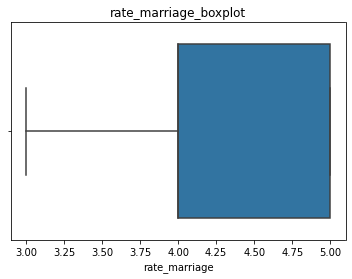

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


age - there is 0 upper bound values and 0 lower bound values 


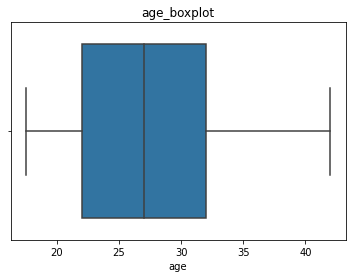

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


yrs_married - there is 0 upper bound values and 0 lower bound values 


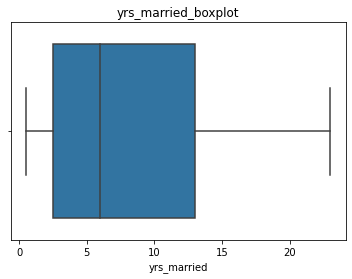

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


children - there is 0 upper bound values and 0 lower bound values 


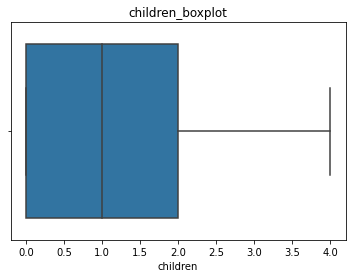

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


religious - there is 0 upper bound values and 0 lower bound values 


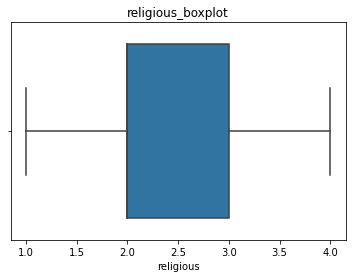

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


educ - there is 0 upper bound values and 0 lower bound values 


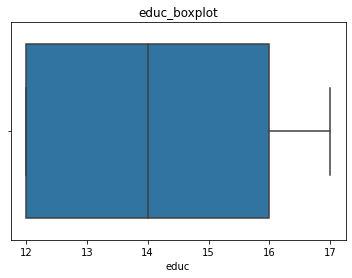

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


occupation - there is 0 upper bound values and 0 lower bound values 


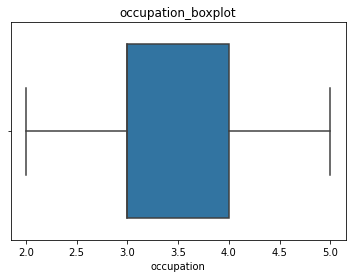

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


occupation_husb - there is 0 upper bound values and 0 lower bound values 


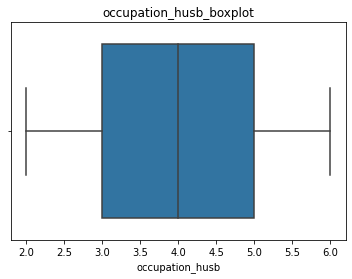

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


affairs - there is 945 upper bound values and 0 lower bound values 


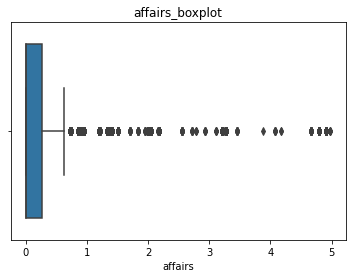

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


affair - there is 0 upper bound values and 0 lower bound values 


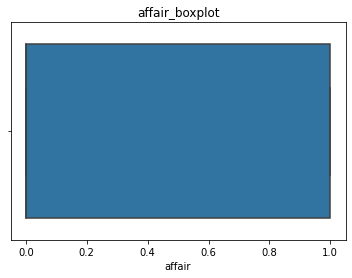

In [38]:
# let's check for outliers again in the dataset
checkOutliers(data = new_data , columnNames=list(new_data.columns))

OK so we have removed most of the outlier some outliers present in Affairs but that has most positive correlation so we can consider .

In [39]:
from sklearn.feature_selection import RFE

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [ ]:
model = LogisticRegression(solver='lbfgs')
# let's run this REF 100 times and select the best average selected feature
total_feature = []
names = list(new_data.columns)
rfe = RFE(model)
for i in range(100):
  fit = rfe.fit(X, y)
  print("Num Features: %d" % fit.n_features_)
  print("Selected Features: %s" % fit.support_)
  print("Feature Ranking: %s" % fit.ranking_)
  total_feature.append([names[i] for i in range(len(fit.support_)) if fit.support_[i] == True])

  #total_feature.append(fit.support_)



In [ ]:
total_feature

SO, from REF method 4 features have got selected ['rate_marriage', 'yrs_married', 'religious', 'affairs']. let's do a trial method of random forest and extra tress and check how many feature will get selected

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)
print(names)

[0.07072    0.0187607  0.04670922 0.02578317 0.02138844 0.0183075
 0.0189689  0.01944825 0.75991381]
['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb', 'affairs', 'affair']


SO , we can see our model is giving highest importance to affairs, then rate_marriage , then yrs_married and then children ,so more or less three features are common here which can be very much use ful.


In [43]:
# making the data frame with just 3 featueres affairs , rate_marriage, and yrs_married
X_2 = dta[['affairs','rate_marriage', 'yrs_married']].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_2,y, test_size = 0.3)

In [45]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [46]:
round(model.score(X_train,y_train) * 100,2)

97.87

In [47]:
round(model.score(X_test,y_test) * 100,2)

97.33

In [48]:
predictions = model.predict(X_test)

In [49]:
print(confusion_matrix(y_test, predictions))

[[1309    0]
 [  51  550]]


In [50]:
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)
precision = TP/(TP+TN)
recall = TP/(TP+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy*100))
print('precision of the binary classification = {:0.3f}'.format(precision*100))
print('recall of the binary classification = {:0.3f}'.format(recall*100))

True Positive(TP)  =  550
False Positive(FP) =  0
True Negative(TN)  =  1309
False Negative(FN) =  51
Accuracy of the binary classification = 97.330
precision of the binary classification = 29.586
recall of the binary classification = 91.514


the model become more bad with 3 features.



In [51]:
## let's train with 4 features.
X_3 = dta[['rate_marriage', 'yrs_married', 'religious', 'affairs']].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_3,y, test_size = 0.3)

In [53]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [54]:
round(model.score(X_train,y_train) * 100,2)

97.78

In [55]:
round(model.score(X_test,y_test) * 100,2)

97.85

In [56]:
predictions = model.predict(X_test)

In [57]:
print(confusion_matrix(y_test, predictions))

[[1313    0]
 [  41  556]]


In [58]:
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)
precision = TP/(TP+TN)
recall = TP/(TP+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy*100))
print('precision of the binary classification = {:0.3f}'.format(precision*100))
print('recall of the binary classification = {:0.3f}'.format(recall*100))

True Positive(TP)  =  556
False Positive(FP) =  0
True Negative(TN)  =  1313
False Negative(FN) =  41
Accuracy of the binary classification = 97.853
precision of the binary classification = 29.749
recall of the binary classification = 93.132


 defnetly the type-II error is increasing even we are considering 4 features.

In [59]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [60]:
round(model.score(X_train,y_train) * 100,2)

97.78

In [61]:
round(model.score(X_test,y_test) * 100,2)

97.85

In [62]:
predictions = model.predict(X_test)

In [63]:
print(confusion_matrix(y_test, predictions))

[[1313    0]
 [  41  556]]


In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_log

  liblinear 0.976
  newton-cg 0.975
  lbfgs 0.975
  sag 0.958
  saga 0.949


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


In [67]:
X_train

(4456, 4)

In [68]:
# define model/create instance
lr=LogisticRegression()
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)
#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15000 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueErro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                      

In [69]:
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.9958774655076297
Best hyperparameters:  {'C': 20, 'class_weight': {0: 0.09324649298597194, 1: 0.906753507014028}, 'penalty': 'l2'}


In [72]:
model.best_params_['class_weight']
model.best_params_['penalty']

'l2'

In [73]:
X_train.shape

(4456, 4)

In [74]:
#Building Model again with best params
lr3=LogisticRegression(class_weight= model.best_params_['class_weight'],C=model.best_params_['C'],penalty=model.best_params_['penalty'])
lr3.fit(X_train,y_train)


LogisticRegression(C=20,
                   class_weight={0: 0.09324649298597194, 1: 0.906753507014028})

In [77]:
y_pred_prob_test = lr3.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr3.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :nn",cm)
print("n")
# ROC- AUC score
print("ROC-AUC score  test dataset:  ", metrics.roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  ", metrics.precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  ", metrics.recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset : ", f1_score(y_test,y_pred_test))

confusion Matrix is :nn [[1310    3]
 [   2  595]]
n
ROC-AUC score  test dataset:   0.9999885183725176
precision score  test dataset:   0.9949832775919732
Recall score  test dataset:   0.9966499162479062
f1 score  test dataset :  0.99581589958159


In [78]:
filename = 'finalized_model_1.sav'
pickle.dump(lr3, open(filename, 'wb'))

In [81]:
dta[['rate_marriage', 'yrs_married', 'religious', 'affairs','affair']]

,rate_marriage,yrs_married,religious,affairs,affair
0,3.0,9.0,3.0,0.111111,1
1,3.0,13.0,1.0,3.230769,1
2,4.0,2.5,1.0,1.400000,1
3,4.0,16.5,3.0,0.727273,1
4,5.0,9.0,1.0,4.666666,1
...,...,...,...,...,...
6361,5.0,13.0,3.0,0.000000,0
6362,4.0,13.0,1.0,0.000000,0
6363,5.0,2.5,2.0,0.000000,0
6364,5.0,6.0,3.0,0.000000,0
